In [1]:
!pip install folium
import folium
import pandas as pd
import datetime
from datetime import timedelta


In [2]:
df_23 = pd.read_csv('2023-04_orca_boardings.csv')

/var/folders/fh/zynvgz3502n7wqtzvnrpjnj40000gn/T/ipykernel_18804/342241639.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_23 = pd.read_csv('2023-04_orca_boardings.csv')


In [3]:
df_23 = df_23.sort_values(by=['business_date','card_id'], ascending=[True,True])

In [4]:
df_23

,txn_id,boarding_guid,txn_type_id,card_id,passenger_type_id,passenger_count,product_id,business_date,device_id,device_dtm_pacific,...,participant_group_id,stop_id,stop_code,ticket_internal_nbr,osfa_cents,ceffv_cents,total_journey_fare_cents,linked_journey_fare_cents,epurse_equivalent_cents,load_start_dtm
256999,195660046,1536003r-70-46-6428623fc2e,66,2,1,1,1003.0,2023-04-01,15360.0,2023-04-01 09:56:31,...,1240.0,96403200.0,37040,307,275,275,275,275,275,2023-04-02 08:52:37
272054,195709760,155140d0-70-60-64287e453b8,66,4,1,1,1003.0,2023-04-01,15514.0,2023-04-01 11:56:05,...,29124.0,96408808.0,55583,307,275,275,275,275,275,2023-04-02 08:52:37
329901,195906358,1308607q-70-66-6428d2d5fce,66,4,1,1,1003.0,2023-04-01,13086.0,2023-04-01 17:56:53,...,29124.0,96440468.0,55778,218,300,300,575,300,157,2023-04-02 08:52:37
330115,195907290,1308607q-70-66-6428d2d5fce,84,4,1,1,1003.0,2023-04-01,15704.0,2023-04-01 17:58:24,...,29124.0,96408992.0,56031,307,275,275,575,300,143,2023-04-02 08:52:37
312589,195845680,165400a3-70-89-6428b977c22,66,9,1,1,102.0,2023-04-01,16540.0,2023-04-01 16:08:39,...,NaN,96400124.0,2672,307,275,275,275,275,275,2023-04-02 08:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420764,213969342,1627607s-70-62-644ec353bea,66,3577027,1,1,NaN,2023-04-30,16276.0,2023-04-30 12:36:51,...,NaN,96409380.0,570,307,275,275,275,275,275,2023-05-02 11:03:28
2410688,213910784,13065018-70-43-644e904a1a2,66,3577863,1,1,NaN,2023-04-30,13065.0,2023-04-30 08:59:06,...,NaN,96440440.0,1108,218,300,225,225,225,225,2023-05-02 11:03:28
2415592,213938742,1286409v-70-38-644eabd0630,66,3577981,1,1,NaN,2023-04-30,12864.0,2023-04-30 10:56:32,...,NaN,96440504.0,990001,218,325,325,325,325,325,2023-05-02 11:03:28
5216060,214045842,1284301e-70-183-644ef8d330c,66,3577981,1,1,NaN,2023-04-30,12843.0,2023-04-30 16:25:07,...,NaN,96440452.0,501,218,300,300,300,300,300,2023-05-02 11:03:28


In [5]:
df_23['device_lat'] = df_23['device_lat'] / 1000000
df_23['device_lng'] = df_23['device_lng'] / 1000000
df_23

,txn_id,boarding_guid,txn_type_id,card_id,passenger_type_id,passenger_count,product_id,business_date,device_id,device_dtm_pacific,...,participant_group_id,stop_id,stop_code,ticket_internal_nbr,osfa_cents,ceffv_cents,total_journey_fare_cents,linked_journey_fare_cents,epurse_equivalent_cents,load_start_dtm
256999,195660046,1536003r-70-46-6428623fc2e,66,2,1,1,1003.0,2023-04-01,15360.0,2023-04-01 09:56:31,...,1240.0,96403200.0,37040,307,275,275,275,275,275,2023-04-02 08:52:37
272054,195709760,155140d0-70-60-64287e453b8,66,4,1,1,1003.0,2023-04-01,15514.0,2023-04-01 11:56:05,...,29124.0,96408808.0,55583,307,275,275,275,275,275,2023-04-02 08:52:37
329901,195906358,1308607q-70-66-6428d2d5fce,66,4,1,1,1003.0,2023-04-01,13086.0,2023-04-01 17:56:53,...,29124.0,96440468.0,55778,218,300,300,575,300,157,2023-04-02 08:52:37
330115,195907290,1308607q-70-66-6428d2d5fce,84,4,1,1,1003.0,2023-04-01,15704.0,2023-04-01 17:58:24,...,29124.0,96408992.0,56031,307,275,275,575,300,143,2023-04-02 08:52:37
312589,195845680,165400a3-70-89-6428b977c22,66,9,1,1,102.0,2023-04-01,16540.0,2023-04-01 16:08:39,...,NaN,96400124.0,2672,307,275,275,275,275,275,2023-04-02 08:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420764,213969342,1627607s-70-62-644ec353bea,66,3577027,1,1,NaN,2023-04-30,16276.0,2023-04-30 12:36:51,...,NaN,96409380.0,570,307,275,275,275,275,275,2023-05-02 11:03:28
2410688,213910784,13065018-70-43-644e904a1a2,66,3577863,1,1,NaN,2023-04-30,13065.0,2023-04-30 08:59:06,...,NaN,96440440.0,1108,218,300,225,225,225,225,2023-05-02 11:03:28
2415592,213938742,1286409v-70-38-644eabd0630,66,3577981,1,1,NaN,2023-04-30,12864.0,2023-04-30 10:56:32,...,NaN,96440504.0,990001,218,325,325,325,325,325,2023-05-02 11:03:28
5216060,214045842,1284301e-70-183-644ef8d330c,66,3577981,1,1,NaN,2023-04-30,12843.0,2023-04-30 16:25:07,...,NaN,96440452.0,501,218,300,300,300,300,300,2023-05-02 11:03:28


In [6]:
df_23['device_dtm_pacific'] = pd.to_datetime(df_23['device_dtm_pacific'])
df_23['business_date'] = pd.to_datetime(df_23['business_date'])
df_23['time_of_day'] = df_23['device_dtm_pacific'].dt.time


In [7]:
df_23=df_23[['card_id','business_date','time_of_day','device_lat','device_lng','stop_code','route_number']]

In [8]:
df_23

,card_id,business_date,time_of_day,device_lat,device_lng,stop_code,route_number
256999,2,2023-04-01,09:56:31,47.690703,-122.360021,37040,45
272054,4,2023-04-01,11:56:05,47.523868,-122.278888,55583,106
329901,4,2023-04-01,17:56:53,47.560280,-122.292892,55778,100479
330115,4,2023-04-01,17:58:24,47.560626,-122.293461,56031,106
312589,9,2023-04-01,16:08:39,47.624075,-122.356790,2672,674
...,...,...,...,...,...,...,...
2420764,3577027,2023-04-30,12:36:51,47.608716,-122.336681,570,40
2410688,3577863,2023-04-30,08:59:06,47.611450,-122.337532,1108,100479
2415592,3577981,2023-04-30,10:56:32,47.659875,-122.314194,990001,100479
5216060,3577981,2023-04-30,16:25:07,47.602139,-122.331055,501,100479


In [9]:
df_23=df_23.dropna(subset=['stop_code'])

In [10]:
df_23.shape

(4994066, 7)

In [ ]:
import random
def random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 200), random.randint(0, 200), random.randint(0, 200))


df_23 = df_23.dropna(subset=['device_lat','device_lng'])
num_rows = df_23.shape[0]
date = df_23.iloc[0]['business_date'].date()
card=1
lat=df_23.iloc[0]['device_lat']
lng=df_23.iloc[0]['device_lng']
m = folium.Map(location=[lat, lng], zoom_start=12)
# for i in range(204900,num_rows):
for i in range(num_rows):
    lat=df_23.iloc[i]['device_lat']
    lng=df_23.iloc[i]['device_lng']
    if(df_23.iloc[i]['business_date'].date()==date):
        if(df_23.iloc[i]['card_id']==card) and (i>0):
            folium.Marker([lat, lng], tooltip=f"Stop ID: {df_23.iloc[i]['stop_code']}").add_to(m)
            folium.Marker([df_23.iloc[i-1]['device_lat'], df_23.iloc[i-1]['device_lng']], tooltip=f"Stop ID: {df_23.iloc[i-1]['stop_code']}").add_to(m)
            line = folium.PolyLine(
                locations=[[lat, lng], [df_23.iloc[i-1]['device_lat'], df_23.iloc[i-1]['device_lng']]],
                color=co,
                weight=2,
                tooltip=f'Card ID: {card}'
            )
            line.add_to(m)
            m.save(f'map{date}.html')
            print(m)
        else:
            card=df_23.iloc[i]['card_id']
            co=random_color()
    else:
        date = date + timedelta(days=1)
        m = folium.Map(location=[lat, lng], zoom_start=12)



In [11]:
trip_count = df_23.groupby('card_id')['business_date'].value_counts().reset_index(name='trip_count')

In [12]:
trip_count

,card_id,business_date,trip_count
0,1,2023-04-02,2
1,1,2023-04-04,2
2,1,2023-04-18,2
3,1,2023-04-20,2
4,1,2023-04-24,2
...,...,...,...
2187773,3577246,2023-04-29,3
2187774,3577863,2023-04-30,1
2187775,3577981,2023-04-30,2
2187776,3578120,2023-04-29,1


In [13]:
count_of_ones = (trip_count['trip_count'] == 1).sum()
print(count_of_ones)
count_of_non_ones = (trip_count['trip_count'] != 1).sum()
count_of_ones/(count_of_ones+count_of_non_ones)*100

656816


30.022058910913263

In [14]:
df_23.shape

(4994066, 7)

In [15]:
df_23=df_23.sort_values(by=['card_id','business_date','time_of_day'], ascending=[True,True,True])

In [16]:
nan_exists = df_23[['card_id', 'business_date', 'time_of_day']].isna().any()
print(nan_exists)

card_id          False
business_date    False
time_of_day      False
dtype: bool


In [17]:
print(df_23.shape)
all_numeric = pd.to_numeric(df_23['stop_code'], errors='coerce').notna().all()

if all_numeric:
    print("All values in 'stop_code' are numbers.")
else:
    print("Not all values in 'stop_code' are numbers.")

df_23 = df_23[pd.to_numeric(df_23['stop_code'], errors='coerce').notna()]
print(df_23.shape)

(4994066, 7)
Not all values in 'stop_code' are numbers.
(4853394, 7)


In [18]:
import warnings
warnings.filterwarnings("ignore")
import json
import numpy as np

In [19]:
df_23

,card_id,business_date,time_of_day,device_lat,device_lng,stop_code,route_number
439379,1,2023-04-02,19:24:54,47.611710,-122.324195,3034,2
447746,1,2023-04-02,22:44:02,47.626855,-122.356853,2680,2
679314,1,2023-04-03,23:54:55,47.611960,-122.335771,1110,11
801361,1,2023-04-04,14:09:12,47.701158,-122.355461,5730,5
809699,1,2023-04-04,14:46:02,47.609986,-122.337038,1180,10
...,...,...,...,...,...,...,...
2410688,3577863,2023-04-30,08:59:06,47.611450,-122.337532,1108,100479
2415592,3577981,2023-04-30,10:56:32,47.659875,-122.314194,990001,100479
5216060,3577981,2023-04-30,16:25:07,47.602139,-122.331055,501,100479
5187245,3578120,2023-04-29,21:50:46,47.809686,-122.382485,2727,196


In [20]:
df_23_timeshift=df_23
am4=pd.to_datetime('04:00:00', format='%H:%M:%S').time()

def shift_time(row):
    if row['time_of_day'] < am4:
        row['business_date_2'] = row['business_date']-pd.DateOffset(days=1)
    else:
        row['business_date_2'] = row['business_date']
    return row

# Apply the time shift
df_23_timeshift = df_23_timeshift.apply(lambda row: shift_time(row), axis=1)

print(df_23_timeshift)

KeyboardInterrupt: 

In [21]:
df_23_timeshift[df_23_timeshift['card_id']==62]

,card_id,business_date,time_of_day,device_lat,device_lng,stop_code,route_number
361120,62,2023-04-01,02:02:30,47.702685,-122.328426,35317,67
264259,62,2023-04-01,10:58:39,47.675816,-122.301040,37990,62
265096,62,2023-04-01,11:05:28,47.676906,-122.315685,23561,67
348278,62,2023-04-01,20:42:25,47.723203,-122.344336,43110,345
448705,62,2023-04-02,00:05:19,47.702662,-122.328320,990005,100479
...,...,...,...,...,...,...,...
2405333,62,2023-04-29,00:16:16,47.702662,-122.328320,990005,100479
5189800,62,2023-04-29,00:50:20,47.675761,-122.316533,16430,62
5152663,62,2023-04-29,13:29:33,47.666431,-122.300570,25792,372
5154349,62,2023-04-29,13:41:34,47.675835,-122.300730,37990,62


In [ ]:
df_23[df_23['card_id']==62]

In [ ]:
taz={}
am4=pd.to_datetime('04:00:00', format='%H:%M:%S').time()
am0=pd.to_datetime('00:00:00', format='%H:%M:%S').time()

def custom_investigation(group):

    n=len(group['time_of_day'])
    origin=group['stop_code'].iloc[0]
    o = origin
    A=datetime.datetime.combine(group['business_date'].iloc[0].date(),group['time_of_day'].iloc[0])
    for i in range(n-1):
        taz.setdefault(o, [])
        time_diff = datetime.datetime.combine(group['business_date'].iloc[i+1].date(), group['time_of_day'].iloc[i+1]) - A
        if time_diff.total_seconds() > 3600 or i+1==n-1:
            destination=group['stop_code'].iloc[i+1]
            taz.setdefault(destination, [])
            taz[o].append(destination)
            o=destination
            A=datetime.datetime.combine(group['business_date'].iloc[i].date(),group['time_of_day'].iloc[i])
            if (i+1==n-1): taz[destination].append(origin)

    return taz

result = df_23_timeshift.groupby(['card_id', 'business_date_2']).apply(custom_investigation)


with open('output.json', "w") as json_file:
     json.dump(taz, json_file, indent=4)

In [ ]:
df_23_timeshift

In [22]:
with open('output.json', 'r') as json_file:
    taz = json.load(json_file)

In [23]:
'35318' in taz['990005']

True

In [24]:
len(taz)

8921

In [25]:
print(df_23['stop_code'].nunique())

9043


In [26]:
a=0
for key, values in taz.items():
    for value in values:
        a+=1
print(a)

3740458


In [27]:
from collections import Counter


In [ ]:
for key in taz.keys():
    count_dict=dict(Counter(taz[key]))
    tuplee = tuple((key2, count) for key2, count in count_dict.items())
    taz[key]=tuplee

In [ ]:
taz['3034'][0:10]

In [ ]:
with open('output_with_counts.json', "w") as json_file:
     json.dump(taz, json_file, indent=4)

In [28]:
tazdf = pd.read_csv('filtered_data_with_taz.csv')

In [29]:
tazdf=tazdf[['card_id','business_date','device_dtm_pacific','device_lat','device_lng','stop_code','TAZ','COUNTY_NM']]
tazdf

,card_id,business_date,device_dtm_pacific,device_lat,device_lng,stop_code,TAZ,COUNTY_NM
0,84105,2023-04-07,2023-04-07 13:07:11,47.257842,-122.446707,344,2807.0,Pierce
1,3096144,2023-04-07,2023-04-07 13:07:12,47.616942,-122.348403,2220,455.0,King
2,461903,2023-04-07,2023-04-07 13:07:12,47.620900,-122.334375,10225,433.0,King
3,499699,2023-04-07,2023-04-07 13:07:12,47.305293,-122.232008,4074,1178.0,King
4,23183,2023-04-07,2023-04-07 13:07:12,47.682291,-122.326883,17140,175.0,King
...,...,...,...,...,...,...,...,...
4916141,290829,2023-04-25,2023-04-25 09:28:54,47.607246,-122.335754,455,521.0,King
4916142,82178,2023-04-25,2023-04-25 09:33:14,47.607246,-122.335754,455,521.0,King
4916143,116508,2023-04-25,2023-04-25 10:03:09,47.607246,-122.335754,455,521.0,King
4916144,279499,2023-04-25,2023-04-25 11:04:50,47.607246,-122.335754,455,521.0,King


In [30]:
print(tazdf['stop_code'].nunique())

9044


In [33]:
print(tazdf['TAZ'].isna().sum())


13154


In [34]:
print(tazdf['stop_code'].isna().sum())


0


In [ ]:
tazdf['device_dtm_pacific'] = pd.to_datetime(tazdf['device_dtm_pacific'])
tazdf['business_date'] = pd.to_datetime(tazdf['business_date'])
tazdf['time_of_day'] = tazdf['device_dtm_pacific'].dt.time

In [ ]:
tazdf.drop(['device_dtm_pacific'],axis=1)

In [ ]:
tazdf=tazdf.dropna(subset=['stop_code'])
tazdf.shape

In [ ]:
print(tazdf.shape)
all_numeric = pd.to_numeric(tazdf['stop_code'], errors='coerce').notna().all()

if all_numeric:
    print("All values in 'stop_code' are numbers.")
else:
    print("Not all values in 'stop_code' are numbers.")

tazdf = tazdf[pd.to_numeric(tazdf['stop_code'], errors='coerce').notna()]
print(tazdf.shape)

In [ ]:
tazdf['stop_code'].nunique()

Merging stop codes with TAZs

In [ ]:
df = pd.DataFrame({key: pd.Series(value) for key, value in taz.items()})
df = df.fillna(value=pd.NA)
df.to_csv('stop_codes.csv')

In [ ]:
df['3034'].count()

In [ ]:
len(taz['3034'])

In [ ]:
type(df['3034'][1])

In [ ]:
type(tazdf['stop_code'][0])

In [ ]:
stop_code_to_taz_mapping = tazdf.set_index('stop_code')['TAZ'].to_dict()
for column in df.columns:
    if column in stop_code_to_taz_mapping:
        df[column] = df[column].map(stop_code_to_taz_mapping)
        # df=df.rename(columns={column:stop_code_to_taz_mapping[column]})

In [ ]:
df

In [ ]:
taz2={}
stop_code_to_taz_mapping = tazdf.set_index('stop_code')['TAZ'].to_dict()
for key, values in taz.items():
    if key in stop_code_to_taz_mapping:
        for value in values:
            taz2.setdefault(stop_code_to_taz_mapping[key],[])
            taz2[stop_code_to_taz_mapping[key]].append(stop_code_to_taz_mapping[value])

In [ ]:
stop_code_to_taz_mapping['3034']

In [ ]:
taz2[574]

In [ ]:
stop_code_to_taz_mapping['2680']

In [ ]:
with open('final_TAZs.json', "w") as json_file:
     json.dump(taz2, json_file, indent=4)

In [ ]:
for key in taz2.keys():
    count_dict=dict(Counter(taz2[key]))
    tuplee = tuple((key2, count) for key2, count in count_dict.items())
    taz2[key]=tuplee

In [ ]:
with open('final_TAZs_count.json', "w") as json_file:
     json.dump(taz2, json_file, indent=4)

In [ ]:
taz2[574]

In [ ]:
taz2[574][0][1]

In [40]:
with open('output_with_counts.json', 'r') as json_file:
    stops_count = json.load(json_file)

In [41]:
type(stops_count['3034'])

list

In [42]:
len(stops_count)

8921

In [43]:
with open('final_TAZs_count.json', 'r') as json_file:
    TAZ_counts = json.load(json_file)

In [47]:
len(TAZ_counts)

2343

In [53]:
type(TAZ_counts['966.0'])

list

In [54]:
len(TAZ_counts)


2343

In [59]:
len(TAZ_counts['966.0'])

52

In [64]:
TAZ_flows=[]

for key in TAZ_counts.keys():
    for i in range(len(TAZ_counts[key])):
        TAZ_flows.append(TAZ_counts[key][i][1])


In [65]:
len(TAZ_flows)

241918

In [92]:
total_flow=sum(TAZ_flows)
total_flow

3739588

In [69]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of TAZ Flows')

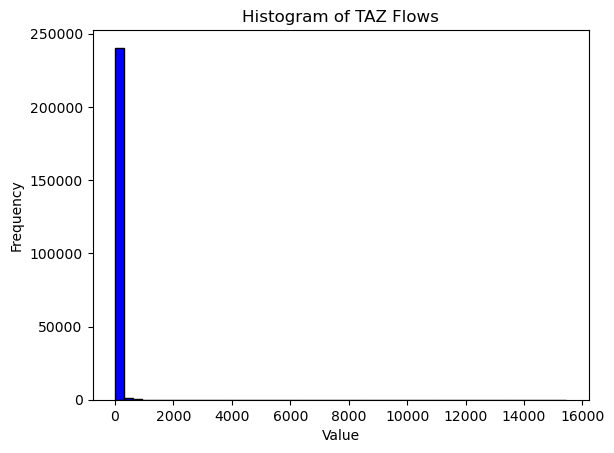

In [105]:
plt.hist(TAZ_flows,bins=50, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TAZ Flows')
# plt.xlim(6000, 8000)
#plt.ylim(0, 1000)

(0.0, 1000.0)

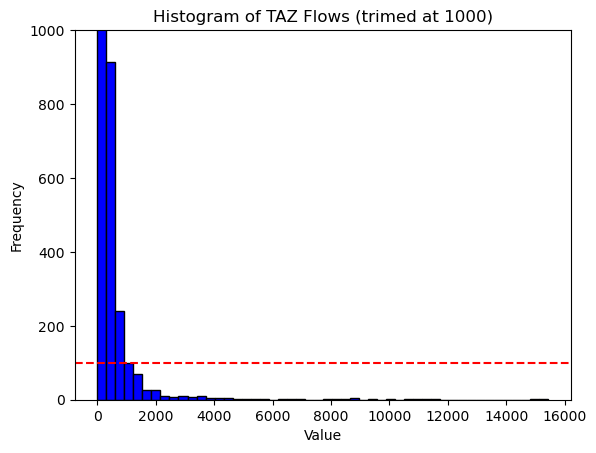

In [108]:
plt.hist(TAZ_flows,bins=50, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TAZ Flows (trimed at 1000)')
plt.axhline(y=100, color='red', linestyle='--', label='y=100')
# plt.xlim(6000, 8000)
plt.ylim(0, 1000)

According to this: threshold=100

(0.0, 100.0)

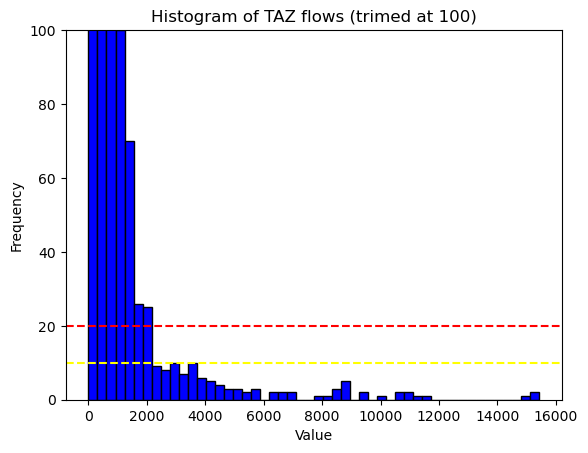

In [110]:
plt.hist(TAZ_flows,bins=50, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TAZ flows (trimed at 100)')
plt.axhline(y=20, color='red', linestyle='--', label='y=20')
plt.axhline(y=10, color='yellow', linestyle='--', label='y=10')
# plt.xlim(6000, 8000)
plt.ylim(0, 100)

Threshold 10:

In [122]:
threshold_TAZ = [value for value in TAZ_flows if value <= 10]

In [123]:
len(threshold_TAZ)

197207

In [124]:
len(TAZ_flows)

241918

Percentage of TAZs having flows less than 10:

In [125]:
len(threshold_TAZ)/len(TAZ_flows)*100


81.51811770930647

Percentage of TAZ flows being less than 10 compared to total flow:

In [126]:
sum(threshold_TAZ)/total_flow*100

13.494962546676264

STOP level:

In [127]:
stop_flows=[]

for key in stops_count.keys():
    for i in range(len(stops_count[key])):
        stop_flows.append(stops_count[key][i][1])


In [128]:
len(stop_flows)

555011

In [129]:
total_flow_stops=sum(stop_flows)
total_flow_stops

3740458

Text(0.5, 1.0, 'Histogram of STOP Flows')

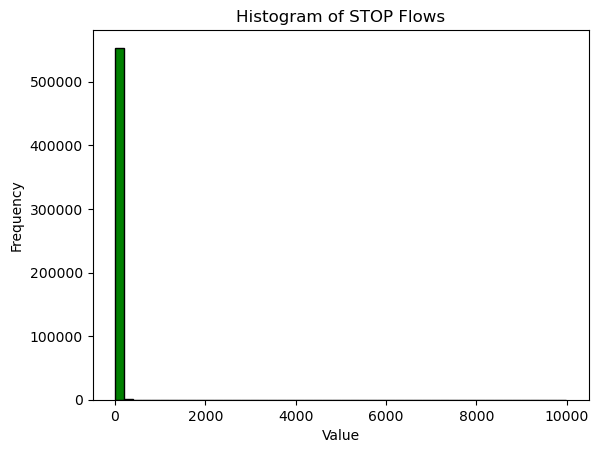

In [130]:
plt.hist(stop_flows,bins=50, color='green', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of STOP Flows')
# plt.xlim(6000, 8000)
#plt.ylim(0, 1000)

(0.0, 1000.0)

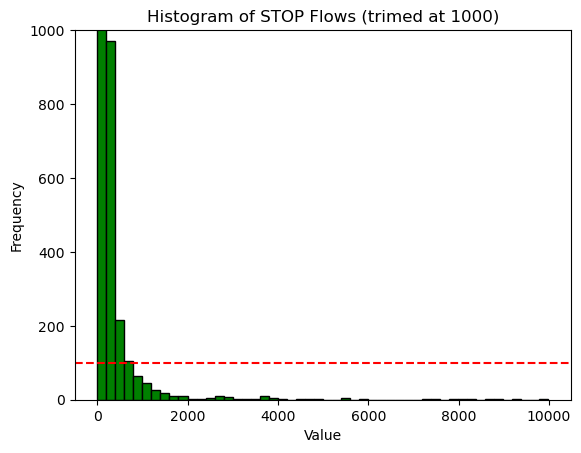

In [131]:
plt.hist(stop_flows,bins=50, color='green', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of STOP Flows (trimed at 1000)')
plt.axhline(y=100, color='red', linestyle='--', label='y=100')
# plt.xlim(6000, 8000)
plt.ylim(0, 1000)

(0.0, 100.0)

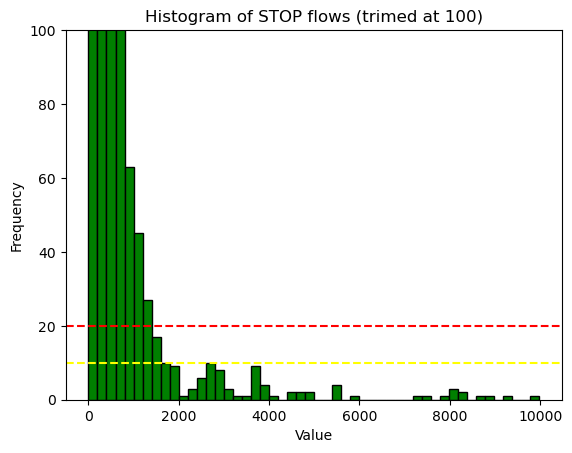

In [143]:
plt.hist(stop_flows,bins=50, color='green', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of STOP flows (trimed at 100)')
plt.axhline(y=20, color='red', linestyle='--', label='y=20')
plt.axhline(y=10, color='yellow', linestyle='--', label='y=10')
# plt.xlim(6000, 8000)
plt.ylim(0, 100)

Threshold 10:

In [134]:
threshold_stop = [value for value in stop_flows if value <= 10]

Percentage of STOPs having flows less than 10:

In [137]:
len(threshold_stop)/len(stop_flows)*100

89.83335465423208

Percentage of STOP flows being less than 10 compared to total flow:

In [138]:
sum(threshold_stop)/total_flow_stops*100

29.327264201335772